# ***Forbes Top 2000 (Year:2017)***

## **Importing the required Libraries**


In [3]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns


## **Read the Dataset**

In [4]:
df=pd.read_excel('DataSets/Forbes-2017.xlsx')

In [5]:
df.shape


(2000, 8)

In [6]:
df.columns

Index(['Rank', 'Name', 'Country', 'Sales', 'Profit', 'Assets', 'Market Value',
       'Year'],
      dtype='object')

In [7]:
df.head()

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Year
0,1,ICBC,China,151.381,41.9837,3473.238,229.805,2017
1,2,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
2,3,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
3,4,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
4,5,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


In [8]:
df.set_index('Rank',inplace=True)

In [9]:
df.head()

,Name,Country,Sales,Profit,Assets,Market Value,Year
Rank,,,,,,,
1,ICBC,China,151.381,41.9837,3473.238,229.805,2017
2,China Construction Bank,China,134.242,34.9814,3016.578,200.458,2017
3,Berkshire Hathaway,United States,222.935,24.0740,620.854,409.908,2017
4,JPMorgan Chase,United States,102.494,24.2310,2512.986,306.616,2017
5,Wells Fargo,United States,97.573,21.9380,1943.443,274.385,2017


In [10]:
df.isnull().sum()

Name            0
Country         0
Sales           2
Profit          0
Assets          1
Market Value    1
Year            0
dtype: int64

In [11]:
df.describe()

,Sales,Profit,Assets,Market Value,Year
count,1998.000000,2000.000000,1999.000000,1999.000000,2000.0
mean,17.680185,1.241552,84.569579,24.423543,2017.0
std,29.329947,2.918115,261.044216,44.772378,0.0
min,0.001000,-13.042100,0.001000,0.072000,2017.0
25%,4.029250,0.317975,10.860500,6.639500,2017.0
50%,8.802500,0.612300,22.884000,11.944000,2017.0
75%,17.449500,1.279825,52.376000,24.362500,2017.0
max,485.252000,45.217000,3473.238000,752.039000,2017.0


In [12]:
df['Sales'].fillna(value=df['Sales'].mean(), inplace=True)

In [13]:
df['Market Value'].fillna(value=df['Market Value'].mean(), inplace=True)

In [14]:
df['Country'].value_counts()

United States     564
Japan             229
China             200
United Kingdom     91
South Korea        64
                 ... 
Jordan              1
Pakistan            1
Puerto Rico         1
Oman                1
Czech Republic      1
Name: Country, Length: 61, dtype: int64

In [15]:
country_vise=df.groupby(['Country'])['Sales'].agg('sum')

In [16]:
country_vise.sort_values(ascending=False)

Country
United States     11503.815000
Japan              4195.509000
China              3904.757000
United Kingdom     1910.350185
Germany            1843.269000
                      ...     
Jordan                2.373000
Egypt                 2.234000
Puerto Rico           1.933000
Pakistan              1.613000
Oman                  1.393000
Name: Sales, Length: 61, dtype: float64

<AxesSubplot:xlabel='Country'>

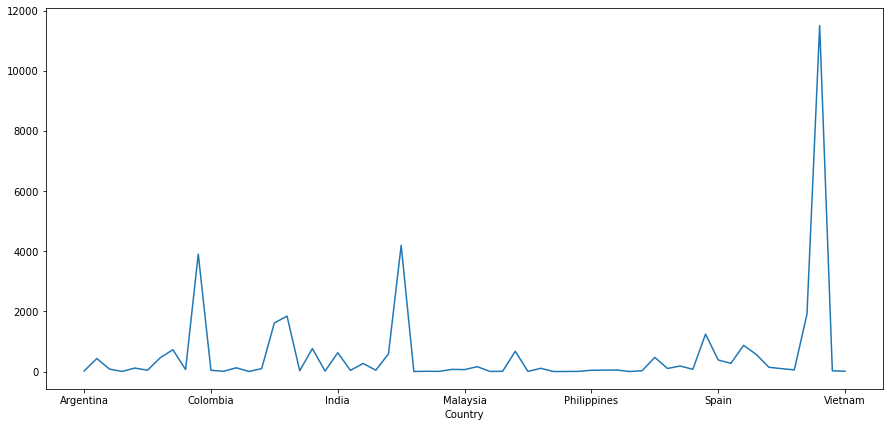

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Country']).sum()['Sales'].plot(ax=ax)